<h1>Lesson 3. Classification: Credit worthiness from German bank</h1>

<img src="https://upload.wikimedia.org/wikipedia/commons/8/8e/Flag_map_of_Germany.svg" style="height:200px;">
  
  <p>In this exercise you will predict credit worthiness of custmers of a German bank (<a href="https://archive.ics.uci.edu/ml/datasets/statlog+(german+credit+data)">provided by Hans Hofmann from Univeristy of Hamburg</a>). The data we will be working with here is a reduced version of the full dataset.</p>
<p>The following features are available for the 1000-row dataset:</p>
<ul>
<li>Class: Credit worthiness (what you are trying to predict)</li>
<li>Duration: Duration of the credit (in months) </li>
<li>Amount: Amount of money asked for (in Deutche Marks (DM))</li>
<li>InstallmentRatePercentage: Installment rate in percentage of disposable income </li>
<li>ResidenceDuration: Number of years at current residence</li>
<li>Age: Person's age</li>
<li>NumberExistingCredits: Number of credit accounts</li>
<li>NumberPeopleMaintenance: Number of people being liable to provide maintenance for the credit</li>
<li>Telephone: Is there a phone number associated with the customer name?  </li>
<li>ForeignWorker: Is the person a foreign worker?</li>
<li>CheckingAccountStatus: Amount of money in the checking account (in DM)<ul>
<li>CheckingAccountStatus.lt.0</li>
<li>CheckingAccountStatus.0.to.200</li>
<li>CheckingAccountStatus.gt.200</li>
</ul></li>
<li>CreditHistory: Past credit history<ul>
<li>CreditHistory.ThisBank.AllPaid</li>
<li>CreditHistory.PaidDuly</li>
<li>CreditHistory.Delay</li>
<li>CreditHistory.Critical</li>
</ul></li>
</ul>

<p>This dataset is available in <a href="http://caret.r-forge.r-project.org/">'caret'</a> library. Let's load it and see how it looks:</p>

In [45]:
import pandas as pd

# loading the training and test dataset
credit_train = pd.read_csv('credit_train.csv')
credit_test = pd.read_csv('credit_test.csv')

credit_train.head()


X_train = credit_train.loc[:, credit_train.columns != 'Class']
X_test =  credit_test.loc[:, credit_train.columns != 'Class']

<h3>Q.1. Show a boxplot of the age of the person asking for the credit vs. their credit worthiness for the training data. Is age a good predictor of the credit worthiness?</h3>

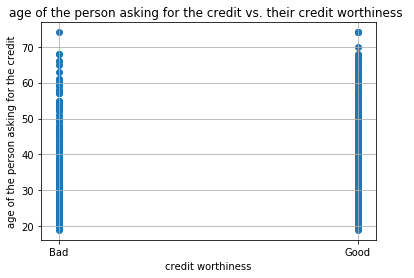

Age is not a good predictor as we cannot any meaningful difference between Bad and Good columns


In [46]:
# Put the command (or commands) here that would give an answer to the above question.
import matplotlib.pyplot as plt

plt.title('age of the person asking for the credit vs. their credit worthiness ')
plt.xlabel('credit worthiness')
plt.ylabel('age of the person asking for the credit')
#plt.legend(loc='upper left')
plt.grid(True)

worthiness = credit_train.loc[:,'Class'].tolist()
age = credit_train.loc[:,'Age'].tolist()

# Add label and color
plt.scatter(worthiness, age)
plt.show()


# Comment whether age is a good predictor
# 
print("Age is not a good predictor as we cannot any meaningful difference between Bad and Good columns")

<h3>Q.2. Can you generate a table that shows CreditHistory.Critical vs. Credit Worthiness for the training data. Can you comment whether person with critical credit history is more credit worthy?</h3> 

defaultdict(<class 'int'>, {('Bad', 0): 208, ('Bad', 1): 38, ('Good', 1): 189, ('Good', 0): 373})
[[189, 373], [38, 208]]


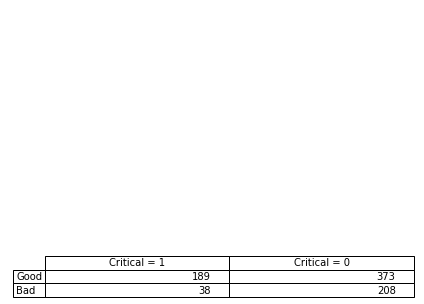

When there is Credit history, we can see that a person is more credit worthy


In [47]:
import matplotlib.pyplot as plt

# Command:
from collections import defaultdict 
critical = credit_train.loc[:,'CreditHistory.Critical'].tolist()
data = [(i,j) for i,j in zip(worthiness, critical)]

d = defaultdict(int)
for k in data:
    d[k] +=1
print(d)
lst_table = [[d[('Good', 1)], d[('Good',0)]], [d[('Bad', 1)],d[('Bad', 0)]]]
print(lst_table)
columns = ['Critical = 1', 'Critical = 0']
rows = ['Good', 'Bad']

fig, ax = plt.subplots()
# One sentence summary:
ax.axis('off')
ax.axis('tight')
ax.table(cellText = lst_table, rowLabels=rows, colLabels=columns)
fig.tight_layout()
plt.show()

# 
print("When there is Credit history, we can see that a person is more credit worthy")

<h3>Q.3. Binarize the y output for e.g. 0 = 'bad' credit; 1 = 'good' credit. </h3>

In [48]:
worthiness_bin = [0 if i=='Bad' else 1 for i in worthiness]


<h3>Q.4. Generate a logistic regression model that uses the data. Provide a summary of the model. </h3>

In [49]:
# http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
from sklearn.linear_model import LogisticRegression
from numpy import reshape
from sklearn.metrics import mean_squared_error, r2_score




# X_train, y_train = reshape(critical,(-1, 1)),  worthiness_bin
y_train = worthiness_bin
# print('{} {}'.format(len(X), len(y)))

LogReg = LogisticRegression()
LogReg.fit(X_train, y_train)
coeffs =  [LogReg.coef_[0][0], LogReg.intercept_[0]]
# print('The equation is y = {}x + {}'.format(*coeffs))
print(LogReg.coef_[0])
print(LogReg.intercept_[0])
score = LogReg.score(X_train, y_train)
print(score)


[-2.40087017e-02 -5.76641600e-05 -1.80534102e-01  6.39207236e-02
  1.50416643e-02  4.27203206e-02  1.41426578e-01 -2.79077326e-01
 -2.65778765e-01 -1.85237712e+00 -1.13973406e+00 -6.73867616e-01
  2.20205068e-02  9.74863158e-01  7.41633915e-01  1.50197783e+00]
1.5501458377476558
0.7747524752475248


<h3>Q.5. Using the developed model, predict the values in credit_test and use it to output a confusion matrix.</h3>

In [50]:
# http://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html
# http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html#sphx-glr-auto-examples-model-selection-plot-confusion-matrix-py
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error, r2_score

y_test = [0 if i=='Bad' else 1 for i in credit_test.loc[:,'Class'].tolist()]
critical = credit_test.loc[:,'CreditHistory.Critical'].tolist()
y_pred = LogReg.predict(X_test)
y_prob = LogReg.predict_proba(X_test) 


# The mean squared error
print("Mean squared error: %.2f"% mean_squared_error(y_test, y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test, y_pred))

conf_mat = confusion_matrix(y_test, y_pred)
print(conf_mat)


Mean squared error: 0.31
Variance score: -0.52
[[ 18  36]
 [ 23 115]]


<h3>Q.6. What is the accuracy of the model on the test data?</h3>

In [51]:
# Command that outputs acccuracy
acc = round((conf_mat[0][0] + conf_mat[1][1]) / (sum(conf_mat[0]) + sum(conf_mat[1])), 2)
print(acc)

0.69


<h3>Q.7. Generate the ROC curve.</h3>

fpr [0.         0.66666667 1.        ]
 tpr [0.         0.83333333 1.        ]
 thresholds [2 1 0]


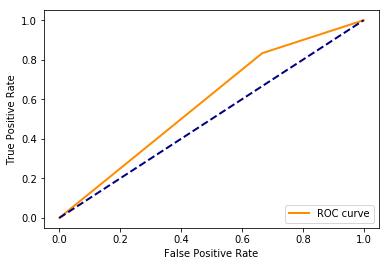

In [52]:
# http://scikit-learn.org/stable/auto_examples/ensemble/plot_feature_transformation.html#sphx-glr-auto-examples-ensemble-plot-feature-transformation-py
    
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
print('fpr {}\n tpr {}\n thresholds {}'.format(fpr, tpr, thresholds ))

plt.figure()
lw = 2
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot(fpr, tpr, color='darkorange',lw=lw, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.legend(loc="lower right")
plt.show()

<h3>Q.8. What is the ROC AUC of the model on the test data?</h3>

In [53]:
# Command(s):
# http://scikit-learn.org/stable/modules/generated/sklearn.metrics.auc.html
from sklearn.metrics import auc
ROC_AUC = auc(fpr, tpr)
print(ROC_AUC)

0.5833333333333335


<h3>Q.9. Calculate LDA model on credit_train.</h3>

In [54]:
# Linear Discriminant Analysis (LDA).
# http://scikit-learn.org/0.16/modules/generated/sklearn.lda.LDA.html
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
LinearDA = LDA()
LinearDA.fit(X_train, y_train)

y_pred = LinearDA.predict(X_test)
conf_mat = confusion_matrix(y_test, y_pred)
print(conf_mat)

[[ 18  36]
 [ 24 114]]


<h3>Q.10. What is the accuracy of the new model?</h3>

In [55]:
# Command that outputs acccuracy
acc = round((conf_mat[0][0] + conf_mat[1][1]) / (sum(conf_mat[0]) + sum(conf_mat[1])), 2)
print(acc)


0.69
